In [102]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [103]:
# seed_file_path = "../Data/Weibo/Seeds/final_seeds.txt"
seed_file_path = "../Data/Weibo/Seeds/final_seeds_without_L2_L3.txt"
# seed_file_path = "../Data/Weibo/Seeds/final_seeds_IMINFECTOR.txt"
gender_profile_path = "../Data/Weibo/Init_Data/profile_gender.csv"
test_cascade_path = "../Data/Weibo/Init_Data/test_cascades.txt"

In [104]:
f = open(seed_file_path,"r")
l = f.read().replace("\n"," ")
seed_set_all = [x for x in l.split(" ") if x!=''][:1000]
f.close()

len(seed_set_all)

1000

In [105]:
def DNI(seed_set_cascades):
    """
    Measure the number of distinct nodes in the test cascades started of the seed set
    """
    combined = set()    
    for i in seed_set_cascades.keys():
        for j in seed_set_cascades[i]:    
            combined = combined.union(j)
    return len(combined)

In [120]:
def DNI_fairness(seed_set_cascades, gender_dict):
    """
    Measure the fraction of males in the toal cascades
    """
    combined = set()    
    for i in seed_set_cascades.keys():
        for j in seed_set_cascades[i]:    
            combined = combined.union(j)
    list_DNI = list(combined)
    males = []
    females = []
    for n in list_DNI:
        if gender_dict[n] == '1':
            males.append(n)
        else:
            females.append(n)
    print("Males in Test Cascade: {} \n Females in Test Cascade: {}".format(str(len(males)), str(len(females))))
    return len(males)/(len(males) + len(females))

In [107]:
def get_gender_dict(path):
    with open(path, 'r',  encoding="ISO-8859-1") as f:
        contents = f.read()
    split_content = contents.split('\n')
    split_content = split_content[0:-1]
    split_content_list=[]
    for i in split_content:
        split_content_list.append(i.split(",")[1:])
    split_content_list=split_content_list[1:]
    
    gender_dict = {}
    for split_data in split_content_list:
        gender_dict[split_data[0]] = split_data[1]
    f.close()    
    return gender_dict

In [108]:
seed_cascades =  {}
seed_set = set()
for s in seed_set_all:
    seed_cascades[str(s)] = []

with open(test_cascade_path) as f:
    for line in f:
        cascade = line.split(";")
        op_id = cascade[1].split(" ")[0]
        cascade = set(map(lambda x: x.split(" ")[0],cascade[2:]))
        if op_id in seed_cascades:
            seed_cascades[op_id].append(cascade)
            seed_set.add(op_id)
                         
            
seed_set_cascades = { seed: seed_cascades[seed] for seed in seed_set if len(seed_cascades[seed])>0 }
spreading_DNI = DNI(seed_set_cascades)

print("Seeds found :",len(seed_set_cascades))
print("Distinct Nodes Infected: ", spreading_DNI)
f.close()

Seeds found : 900
Distinct Nodes Infected:  506375


In [109]:
gender_dict = get_gender_dict(gender_profile_path)

In [110]:
len(gender_dict)

1170873

In [121]:
DNI_fairness(seed_set_cascades, gender_dict)

Males in Test Cascade: 393580 
 Females in Test Cascade: 112795


0.7772500617131572

In [122]:
393580/775836

0.5072979340994747

In [123]:
112795/395037

0.28553021615696755

In [124]:
def fairness_score(I_males, I_females, N_males, N_females):
    num = abs((I_males/N_males)-(I_females/N_females))
    denom = max((I_males/N_males), (I_females/N_females))
    value = (1 - (num/denom))
    return value

In [125]:
fairness_score(393580, 112795, 775836, 395037)

0.5628452176999773

In [112]:
def DNI_fairness_dist(seed_set_cascades, gender_dict):
    """
    Measure the distribution of males in the toal cascades
    """
     
    males_dist = []
    for i in seed_set_cascades.keys():
        for j in seed_set_cascades[i]: 
            males = []
            females = []
            for n in j:
                if gender_dict[n] == '1':
                    males.append(n)
                else:
                    females.append(n)
            males_frac_cascade = len(males)/(len(males) + len(females))
            males_dist.append(males_frac_cascade)
    return np.array(males_dist)  

In [113]:
males_dist = DNI_fairness_dist(seed_set_cascades, gender_dict)

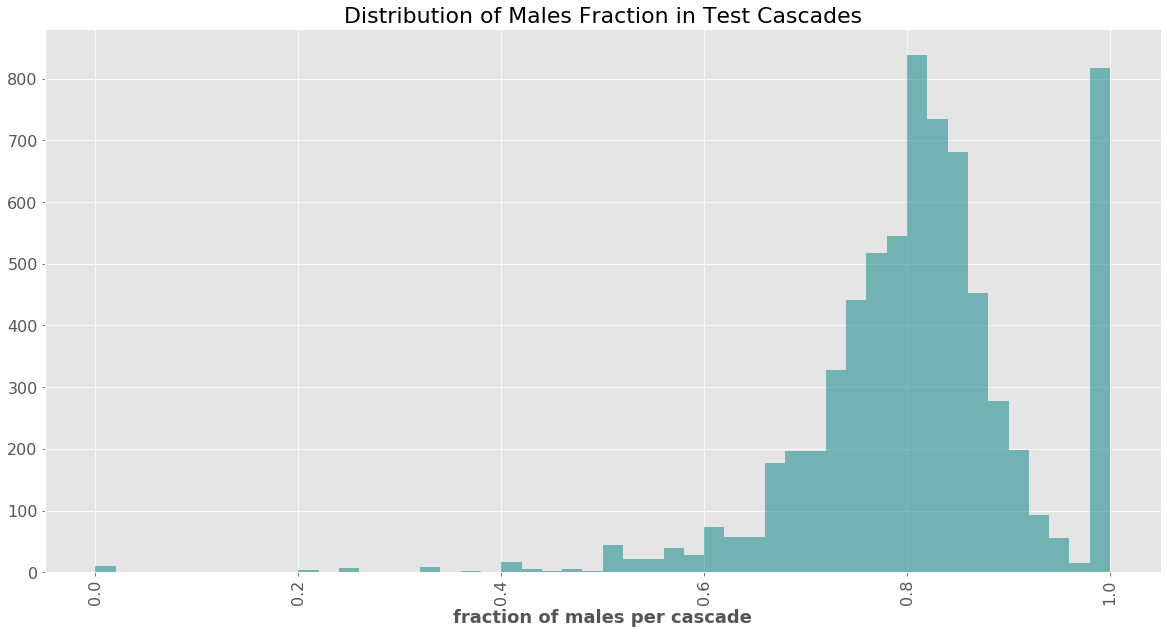

<Figure size 432x288 with 0 Axes>

In [114]:
plt.figure(figsize=(20,10))
plt.style.use('ggplot')
plt.hist(males_dist, bins = 50, color = 'teal', alpha = 0.5)
plt.xlabel('fraction of males per cascade', fontsize=18, fontweight='bold')
plt.xticks(rotation=90)
plt.title("Distribution of Males Fraction in Test Cascades",  fontsize=22)
plt.tick_params(axis='both', which='major', labelsize=16)
plt.show()
plt.savefig("males_fraction_test_cascades.png")

In [115]:
np.mean(males_dist)

0.8133227687153827

In [116]:
def DNI_fairness_dist_by_influencer(seed_set_cascades, gender_dict):
    """
    Measure the distribution of males by influencer
    """
     
    males_dist = []
    for i in seed_set_cascades.keys():
        influencer_spread_set = ()
        for j in seed_set_cascades[i]: 
            influencer_spread_set = influencer_spread_set.union(j)
            
        males = []
        females = []
        for n in influencer_spread_set:
            if gender_dict[n] == '1':
                males.append(n)
            else:
                females.append(n)
        males_frac_cascade = len(males)/(len(males) + len(females))
        males_dist.append(males_frac_cascade)
    return np.array(males_dist)  

In [117]:
males_dist_by_influencer = DNI_fairness_dist(seed_set_cascades, gender_dict)

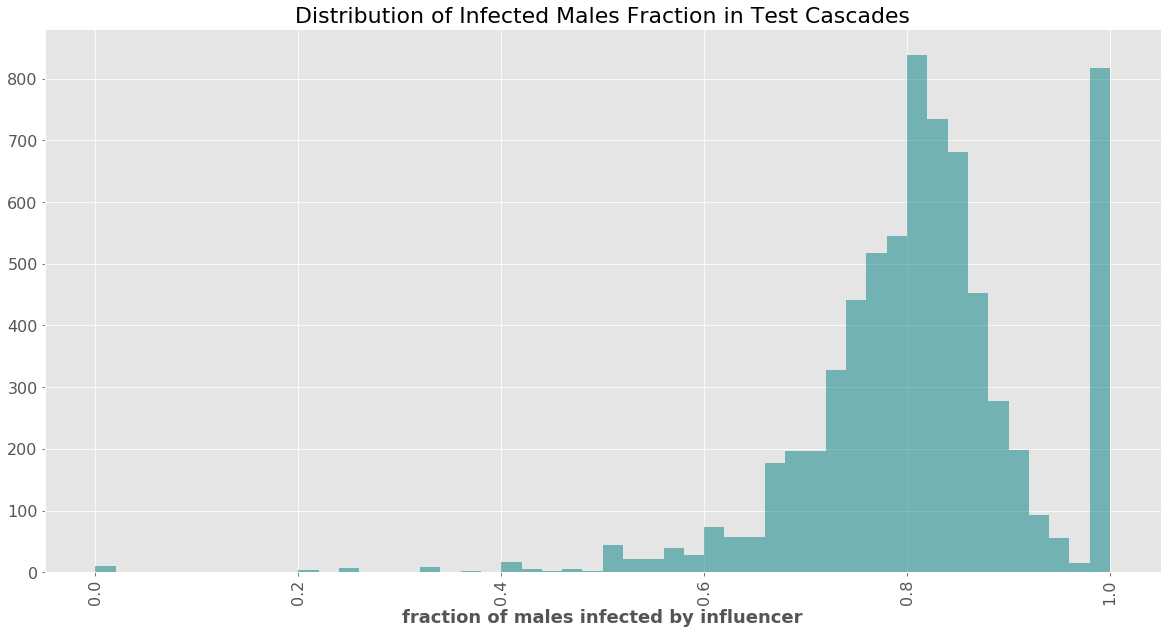

<Figure size 432x288 with 0 Axes>

In [118]:
plt.figure(figsize=(20,10))
plt.style.use('ggplot')
plt.hist(males_dist_by_influencer, bins = 50, color = 'teal', alpha = 0.5)
plt.xlabel('fraction of males infected by influencer', fontsize=18, fontweight='bold')
plt.xticks(rotation=90)
plt.title("Distribution of Infected Males Fraction in Test Cascades",  fontsize=22)
plt.tick_params(axis='both', which='major', labelsize=16)
plt.show()
plt.savefig("males_fraction_test_cascades.png")